Title: Classification Model Performance Metrics

Accuracy, Precision, Recall, F1-Score:

Task 1: Evaluate a binary classifier for spam detection using accuracy, precision, recall and F1-score.

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example true labels (0 = ham, 1 = spam)
y_true = [0, 1, 0, 1, 0, 1, 0, 0, 1, 1]

# Example predicted labels by the classifier
y_pred = [0, 1, 0, 0, 0, 1, 0, 1, 1, 0]

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")


Accuracy:  0.7000
Precision: 0.7500
Recall:    0.6000
F1-score:  0.6667



Task 2: Compare performance of a multi-class classifier on recognizing animals.

In [2]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

# Example true labels (3 classes: 0=Cat, 1=Dog, 2=Rabbit)
y_true = [0, 1, 2, 1, 0, 2, 2, 1, 0, 0]

# Predicted labels by two classifiers for comparison
y_pred_model1 = [0, 1, 2, 0, 0, 2, 1, 1, 0, 2]  # Model 1 predictions
y_pred_model2 = [0, 2, 2, 1, 0, 2, 2, 0, 0, 0]  # Model 2 predictions

def evaluate_model(y_true, y_pred, model_name):
    print(f"Performance metrics for {model_name}:")
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-score:  {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['Cat', 'Dog', 'Rabbit']))
    print("="*50)

# Evaluate Model 1
evaluate_model(y_true, y_pred_model1, "Model 1")

# Evaluate Model 2
evaluate_model(y_true, y_pred_model2, "Model 2")


Performance metrics for Model 1:
Accuracy:  0.7000
Precision: 0.6944
Recall:    0.6944
F1-score:  0.6944

Classification Report:
              precision    recall  f1-score   support

         Cat       0.75      0.75      0.75         4
         Dog       0.67      0.67      0.67         3
      Rabbit       0.67      0.67      0.67         3

    accuracy                           0.70        10
   macro avg       0.69      0.69      0.69        10
weighted avg       0.70      0.70      0.70        10

Performance metrics for Model 2:
Accuracy:  0.8000
Precision: 0.8500
Recall:    0.7778
F1-score:  0.7487

Classification Report:
              precision    recall  f1-score   support

         Cat       0.80      1.00      0.89         4
         Dog       1.00      0.33      0.50         3
      Rabbit       0.75      1.00      0.86         3

    accuracy                           0.80        10
   macro avg       0.85      0.78      0.75        10
weighted avg       0.84      0.80  

Task 3: Analyze classifier performance for predicting disease outbreaks.

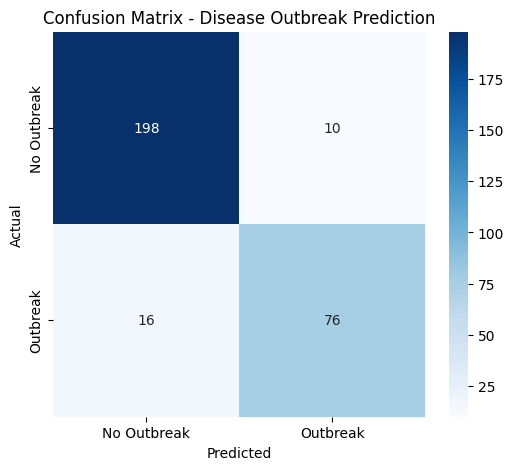

Classification Report:
              precision    recall  f1-score   support

 No Outbreak       0.93      0.95      0.94       208
    Outbreak       0.88      0.83      0.85        92

    accuracy                           0.91       300
   macro avg       0.90      0.89      0.90       300
weighted avg       0.91      0.91      0.91       300



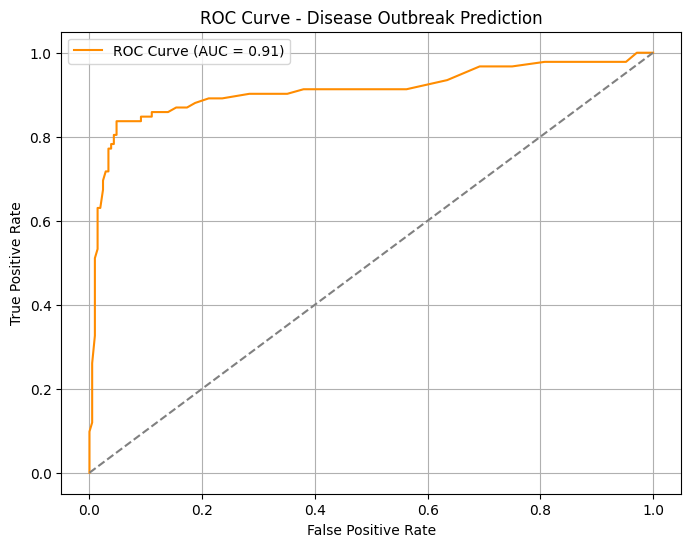

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, classification_report,
                             roc_curve, roc_auc_score)

# Step 1: Create synthetic dataset simulating disease outbreak (binary classification)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           weights=[0.7, 0.3], flip_y=0.05, random_state=42)

# Step 2: Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a classifier (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict on test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probability for positive class

# Step 5: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['No Outbreak', 'Outbreak']

# Step 6: Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Disease Outbreak Prediction')
plt.show()

# Step 7: Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=labels))

# Step 8: ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Disease Outbreak Prediction')
plt.legend()
plt.grid(True)
plt.show()
